# Lab 6


You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [2]:
import random

class Cards:
    def __init__(self,suits, ranks):
        self.suits=suits
        self.ranks=ranks

    def value(self):
        if isinstance(self.ranks,int):
            return self.ranks
        elif self.ranks in ['Jack','King','Queen']:
            return 10
        elif self.ranks=='Ace':
            return 1
        else:
            return 0

    def __str__(self):
        return f'{self.ranks} of {self.suits}'


class Deck:
    def __init__(self,num_deck=4):
        self.suits=['Clubs','Diamonds','Hearts','Spades']
        self.ranks=[2,3,4,5,6,7,8,9,10,'Jack','King','Queen','Ace']
        self.deck=self.get_deck(num_deck)


    def plastic(self):
        position=random.randint(0,len(self.deck)-1)
        self.deck.insert(position,'Plastic')


    def get_deck(self,num_deck):
        return [Cards(suit,rank) for suit in self.suits for rank in self.ranks]*num_deck


    def shuffle_deck(self):
        random.shuffle(self.deck)
        print('Deck was shuffled')

    def draw(self):
        if len(self.deck)==0:
            return 'Deck is empty'
        drawn_card=self.deck.pop(0)
        if isinstance(drawn_card, str) and drawn_card == 'Plastic':
            self.shuffle_deck()
            return self.draw()
        return drawn_card

In [14]:
## Testing
deck=Deck(6)
deck.shuffle_deck()
card=deck.draw()
print(card)
deck.shuffle_deck()
card=deck.draw()
print(card)



Deck was shuffled
Ace of Hearts
Deck was shuffled
7 of Hearts


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [ ]:
##In pdf file

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [ ]:
# In pdf file

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [16]:
class Dealer:
    def __init__(self):
        self.hand=[]
        self.reveal=False

    def dealer_draw(self,deck):
        self.hand.append(deck.draw())
        self.hand.append(deck.draw())
        return self.hand

    def hit(self,deck):
        if sum(card.value() for card in self.hand)<=16:
            self.hand.append(deck.draw())
            print('The Dealer hit')
        else:
            print('Dealer is standing')
        self.reveal=True

    def count_cards(self):
        return sum(card.value() for card in self.hand)

    def dealer_shown(self):
        if self.reveal:
            return f"Dealer's hand: {[str(card) for card in self.hand]} (Total value: {self.count_cards()})"
        else:
            shown=[str(self.hand[1])]
            return f"Dealer's hand: {shown} + ['Hidden card']"

class Player:
    def __init__(self,chips,name):
        self.chips=chips
        self.name=name
        self.hand=[]

    def hit(self,card):
        self.hand.append(card)
        print(f'{self.name} hit!')


    def pay_out(self,amount):
        self.chips+=amount
        print(f'{self.name} gained a total of {amount} chips!')

    def deduct(self,amount):
        if amount>self.chips:
            print("Not enough chips")
        else:
            self.chips-=amount
            print(f'{self.name} got {amount} deducted!')

    def bet(self,bet_amount):
        if bet_amount>self.chips:
            print("Not enough chips")
        else:
            self.chips-=bet_amount
            print(f'{self.name} bet a total of {bet_amount}')

    def stand(self):
        print(f'{self.name} chose to stand')

    def double_bet(self):
        self.bet_amount*2
        self.hand.append(deck.draw())
        print(f'{self.name} doubled their bet!')


    def play(self,deck):
        pass
    def count_cards(self):
        return sum(card.value() for card in self.hand)

    def player_shown(self):
        return f'{self.name}s hand: {[str(card) for card in self.hand]}'

In [67]:
## Testing
deck=Deck(6)
deck.shuffle_deck()
card=deck.draw()

dealer=Dealer()
player=Player(100,'player1')

dealer.dealer_draw(deck)
dealer.dealer_draw(deck)

player.hit(deck)
player.stand()


player.bet(7)

dealer.hit(deck)



Deck was shuffled
player1 hit!
player1 chose to stand
player1 bet a total of 7
Dealer is standing


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [18]:
class Player1(Player):
    def bet(self):
        bet_amount=min(self.chips, max(20, self.chips//5))
        self.chips-=bet_amount
        self.bet_amount=bet_amount
        print(f'{self.name} bet a total of {bet_amount}')
        return bet_amount

    def play(self, deck):
        print(f'{self.name} is playing...')
        while self.count_cards()<15:
            self.hit(deck.draw())
        self.stand()


class Player2(Player):
    def bet(self):
        bet_amount=min(self.chips, 30)
        self.chips-=bet_amount
        self.bet_amount=bet_amount
        print(f'{self.name} bet a total of {bet_amount}')
        return bet_amount

    def play(self, deck):
        print(f'{self.name} is playing...')
        while self.count_cards()<16:
            self.hit(deck.draw())
        self.stand()


class Player3(Player):
    def bet(self):
        bet_amount=min(self.chips, max(50, self.chips//10))
        self.chips-=bet_amount
        self.bet_amount=bet_amount
        print(f'{self.name} bet a total of {bet_amount}')
        return bet_amount

    def play(self, deck):
        print(f'{self.name} is playing...')
        while self.count_cards()<17:
            self.hit(deck.draw())
        self.stand()

In [20]:
## Testing game

def blackjack():

    rounds=1
    while rounds<=3:
        print(f"\n\n\nRound {rounds}!")
        deck=Deck(6)
        deck.shuffle_deck()
        dealer=Dealer()
        players=[Player1(100,'Amy'),Player2(100,'Jonh'),Player3(100,'Alice')]

        print("Players are betting:")
        for player in players:
            player.bet()

        for player in players:
            player.hand = [deck.draw(),deck.draw()]
        dealer.dealer_draw(deck)


        print("\n\nInitial hands:")
        for player in players:
            print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        print(f"Dealer's hand: {dealer.dealer_shown()}")


        for player in players:
            print(f"\n{player.name}'s turn:")
            player.play(deck)

        print("\nDealer's turn:")
        dealer.hit(deck)
        print(f"Dealer's final hand: {dealer.dealer_shown()} (Total value: {dealer.count_cards()})")

        print("\n\nFinal hands:")
        for player in players:
            print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        print(f"Dealer's hand: {dealer.dealer_shown()}")

        print("\nGame results:")
        for player in players:
            if player.count_cards()>21:
                print(f"{player.name} busted! Dealer wins.")
            elif dealer.count_cards()>21:
                print(f"{player.name} wins! Dealer busted.")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()>dealer.count_cards():
                print(f"{player.name} wins!")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()<dealer.count_cards():
                print(f"Dealer beats {player.name}.")
            else:
                print(f"{player.name} and Dealer tied.")

        for player in players:
            if player.chips<=0:
                print(f"{player.name} is out of chips and cannot play in the next round.")

        rounds+=1

blackjack()




Round 1!
Deck was shuffled
Players are betting:
Amy bet a total of 20
Jonh bet a total of 30
Alice bet a total of 50


Initial hands:
Amy's hand: Amys hand: ['7 of Diamonds', '4 of Hearts'] (Total value: 11)
Jonh's hand: Jonhs hand: ['2 of Hearts', '4 of Hearts'] (Total value: 6)
Alice's hand: Alices hand: ['Ace of Clubs', '3 of Clubs'] (Total value: 4)
Dealer's hand: Dealer's hand: ['2 of Spades'] + ['Hidden card']

Amy's turn:
Amy is playing...
Amy hit!
Amy chose to stand

Jonh's turn:
Jonh is playing...
Jonh hit!
Jonh hit!
Jonh chose to stand

Alice's turn:
Alice is playing...
Alice hit!
Alice hit!
Alice hit!
Alice chose to stand

Dealer's turn:
The Dealer hit
Dealer's final hand: Dealer's hand: ['6 of Clubs', '2 of Spades', '6 of Spades'] (Total value: 14) (Total value: 14)


Final hands:
Amy's hand: Amys hand: ['7 of Diamonds', '4 of Hearts', '9 of Hearts'] (Total value: 20)
Jonh's hand: Jonhs hand: ['2 of Hearts', '4 of Hearts', '3 of Diamonds', '10 of Hearts'] (Total value: 1

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [21]:
class NewPlayer(Player):
    def __init__(self, chips, name, threshold):
        super().__init__(chips, name)
        self.threshold=threshold
        self.card_count=0

    def update_count(self, card):
        if card.ranks in [2,3,4,5,6]:
            self.card_count+=1
        elif card.ranks in [10,'Jack','King','Queen','Ace']:
            self.card_count-=1
        else:
            return 0

    def bet(self):
        bet_amount=min(self.chips, max(20,self.chips//5))
        self.chips-=bet_amount
        self.bet_amount=bet_amount
        print(f'{self.name} bet a total of {bet_amount}')
        return bet_amount

    def play(self, deck):
        print(f'{self.name} is playing...')

        while self.count_cards()<17:
            card=deck.draw()
            self.hit(card)
            self.update_count(card)
            if self.card_count>=self.threshold:
                self.stand()
                break

    def count_cards(self):
        return sum(card.value() for card in self.hand)

    def player_shown(self):
        return f'{self.name}s hand: {[str(card) for card in self.hand]}'

In [24]:
def blackjack():

    rounds=1
    while rounds<=1:
        print(f"Round {rounds}!")
        deck=Deck(6)
        deck.shuffle_deck()
        dealer=Dealer()
        players=[NewPlayer(100,'New',4)]

        print("Players are betting:")
        for player in players:
            player.bet()

        for player in players:
            player.hand = [deck.draw(),deck.draw()]
        dealer.dealer_draw(deck)


        print("\n\nInitial hands:")
        for player in players:
            print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        print(f"Dealer's hand: {dealer.dealer_shown()}")


        for player in players:
            print(f"\n{player.name}'s turn:")
            player.play(deck)

        print("\nDealer's turn:")
        dealer.hit(deck)
        print(f"Dealer's final hand: {dealer.dealer_shown()} (Total value: {dealer.count_cards()})")

        for player in players:
            for card in player.hand:
                if isinstance(player, NewPlayer):
                    player.update_count(card)

        for card in dealer.hand:
            if isinstance(player, NewPlayer):
                player.update_count(card)

        print("\n\nFinal hands:")
        for player in players:
            print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        print(f"Dealer's hand: {dealer.dealer_shown()}")

        print("\nGame results:")
        for player in players:
            if player.count_cards()>21:
                print(f"{player.name} busted! Dealer wins.")
            elif dealer.count_cards()>21:
                print(f"{player.name} wins! Dealer busted.")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()>dealer.count_cards():
                print(f"{player.name} wins!")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()<dealer.count_cards():
                print(f"Dealer beats {player.name}.")
            else:
                print(f"{player.name} and Dealer tied.")

        for player in players:
            if player.chips<=0:
                print(f"{player.name} is out of chips and cannot play in the next round.")

        rounds+=1

blackjack()

Round 1!
Deck was shuffled
Players are betting:
New bet a total of 20


Initial hands:
New's hand: News hand: ['10 of Hearts', 'King of Clubs'] (Total value: 20)
Dealer's hand: Dealer's hand: ['King of Clubs'] + ['Hidden card']

New's turn:
New is playing...

Dealer's turn:
Dealer is standing
Dealer's final hand: Dealer's hand: ['9 of Spades', 'King of Clubs'] (Total value: 19) (Total value: 19)


Final hands:
New's hand: News hand: ['10 of Hearts', 'King of Clubs'] (Total value: 20)
Dealer's hand: Dealer's hand: ['9 of Spades', 'King of Clubs'] (Total value: 19)

Game results:
New wins!
New gained a total of 40 chips!


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [25]:
def blackjack(verbose=True):

    rounds=1
    while rounds<=50:
        print(f"Round {rounds}!")
        deck=Deck(6)
        deck.shuffle_deck()
        dealer=Dealer()
        players=[Player1(100, 'Amy'),Player2(100, 'Jonh'),Player3(100, 'Alice'),NewPlayer(100,'New',4)]

        if verbose:
            print("Players are betting:")
        for player in players:
            player.bet()

        for player in players:
            player.hand = [deck.draw(),deck.draw()]
        dealer.dealer_draw(deck)

        if verbose:
            print("\n\nInitial hands:")
        for player in players:
            if verbose:
                print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        if verbose:
            print(f"Dealer's hand: {dealer.dealer_shown()}")


        for player in players:
            if verbose:
                print(f"\n{player.name}'s turn:")
            player.play(deck)

        if verbose:
            print("\nDealer's turn:")
        dealer.hit(deck)
        if verbose:
            print(f"Dealer's final hand: {dealer.dealer_shown()} (Total value: {dealer.count_cards()})")

        for player in players:
            for card in player.hand:
                if isinstance(player, NewPlayer):
                    player.update_count(card)

        for card in dealer.hand:
            if isinstance(player, NewPlayer):
                player.update_count(card)

        if verbose:
            print("\n\nFinal hands:")
        for player in players:
            if verbose:
                print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        if verbose:
              print(f"Dealer's hand: {dealer.dealer_shown()}")

        print("\nGame results:")
        for player in players:
            if player.count_cards()>21:
                print(f"{player.name} busted! Dealer wins.")
            elif dealer.count_cards()>21:
                print(f"{player.name} wins! Dealer busted.")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()>dealer.count_cards():
                print(f"{player.name} wins!")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()<dealer.count_cards():
                print(f"Dealer beats {player.name}.")
            else:
                print(f"{player.name} and Dealer tied.")

        for player in players:
            if player.chips<=0:
                print(f"{player.name} is out of chips and cannot play in the next round.")

        rounds+=1

blackjack(verbose=False)

Round 1!
Deck was shuffled
Amy bet a total of 20
Jonh bet a total of 30
Alice bet a total of 50
New bet a total of 20
Amy is playing...
Amy chose to stand
Jonh is playing...
Jonh chose to stand
Alice is playing...
Alice hit!
Alice chose to stand
New is playing...
New hit!
New hit!
Dealer is standing

Game results:
Amy and Dealer tied.
Jonh and Dealer tied.
Dealer beats Alice.
New busted! Dealer wins.
Round 2!
Deck was shuffled
Amy bet a total of 20
Jonh bet a total of 30
Alice bet a total of 50
New bet a total of 20
Amy is playing...
Amy hit!
Amy hit!
Amy chose to stand
Jonh is playing...
Jonh hit!
Jonh chose to stand
Alice is playing...
Alice hit!
Alice hit!
Alice hit!
Alice chose to stand
New is playing...
New hit!
New hit!
Dealer is standing

Game results:
Amy wins!
Amy gained a total of 40 chips!
Jonh busted! Dealer wins.
Alice busted! Dealer wins.
Dealer beats New.
Round 3!
Deck was shuffled
Amy bet a total of 20
Jonh bet a total of 30
Alice bet a total of 50
New bet a total of 20

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt


def blackjack_simulation(verbose=True):
    winnings = []
    deck=Deck(6)
    deck.shuffle_deck()
    dealer=Dealer()
    for i in range(100):
        players=[Player1(100, 'Amy'),Player2(100, 'Jonh'),Player3(100, 'Alice'),NewPlayer(100,'New',4)]

        for i in range(50):
            
            if verbose:
                print("Players are betting:")
            for player in players:
                player.bet()

            for player in players:
                player.hand = [deck.draw(),deck.draw()]
            dealer.dealer_draw(deck)

            if verbose:
                print("\n\nInitial hands:")
            for player in players:
                if verbose:
                    print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
            if verbose:
                print(f"Dealer's hand: {dealer.dealer_shown()}")


            for player in players:
                if verbose:
                    print(f"\n{player.name}'s turn:")
                player.play(deck)

            if verbose:
                print("\nDealer's turn:")
            dealer.hit(deck)
            if verbose:
                print(f"Dealer's final hand: {dealer.dealer_shown()} (Total value: {dealer.count_cards()})")

            for player in players:
                for card in player.hand:
                    if isinstance(player, NewPlayer):
                        player.update_count(card)

            for card in dealer.hand:
                if isinstance(player, NewPlayer):
                    player.update_count(card)

            if verbose:
                print("\n\nFinal hands:")
            for player in players:
                if verbose:
                    print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
            if verbose:
                print(f"Dealer's hand: {dealer.dealer_shown()}")

            print("\nGame results:")
            for player in players:
                if player.count_cards()>21:
                    print(f"{player.name} busted! Dealer wins.")
                elif dealer.count_cards()>21:
                    print(f"{player.name} wins! Dealer busted.")
                    player.pay_out(player.bet_amount*2)
                elif player.count_cards()>dealer.count_cards():
                    print(f"{player.name} wins!")
                    player.pay_out(player.bet_amount*2)
                elif player.count_cards()<dealer.count_cards():
                    print(f"Dealer beats {player.name}.")
                else:
                    print(f"{player.name} and Dealer tied.")

            for player in players:
                if player.chips<=0:
                    print(f"{player.name} is out of chips and cannot play in the next round.")

            winnings.append(player.chips)
    return winnings

winnings=blackjack_simulation(verbose=False)



Deck was shuffled
Amy bet a total of 20
Jonh bet a total of 30
Alice bet a total of 50
New bet a total of 20
Amy is playing...
Amy hit!
Amy chose to stand
Jonh is playing...
Jonh hit!
Jonh hit!
Jonh chose to stand
Alice is playing...
Alice hit!
Alice hit!
Alice chose to stand
New is playing...
New hit!
New hit!
Dealer is standing

Game results:
Amy wins!
Amy gained a total of 40 chips!
Dealer beats Jonh.
Alice busted! Dealer wins.
New and Dealer tied.
Amy bet a total of 24
Jonh bet a total of 30
Alice bet a total of 50
New bet a total of 20
Amy is playing...
Amy hit!
Amy chose to stand
Jonh is playing...
Jonh hit!
Jonh chose to stand
Alice is playing...
Alice chose to stand
New is playing...
New hit!
Dealer is standing

Game results:
Amy wins! Dealer busted.
Amy gained a total of 48 chips!
Jonh wins! Dealer busted.
Jonh gained a total of 60 chips!
Alice wins! Dealer busted.
Alice gained a total of 100 chips!
New wins! Dealer busted.
New gained a total of 40 chips!
Amy bet a total of 28

AttributeError: 'str' object has no attribute 'value'

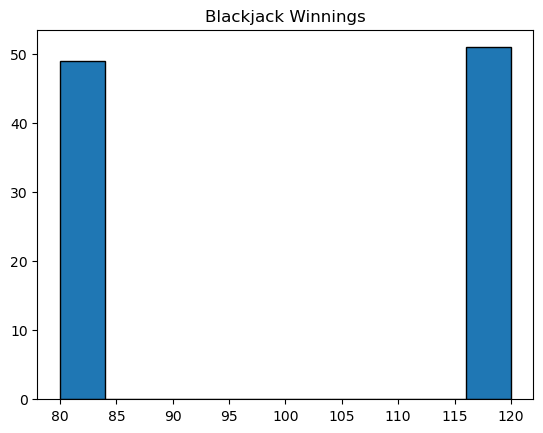

In [41]:
##Histogram

plt.hist(winnings,bins=10,edgecolor='black')
plt.title("Blackjack Winnings")
plt.show()

In [46]:
## Average/standard devation

average=np.mean(winnings)
std_dev=np.std(winnings)

print(average)
print(std_dev)

97.2
19.803030071178497


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [48]:
class NewPlayer(Player):
    def __init__(self, chips, name, threshold):
        super().__init__(chips, name)
        self.threshold=threshold
        self.card_count=0

    def update_count(self, card):
        if card.ranks in [2,3,4,5,6]:
            self.card_count+=1
        elif card.ranks in [10,'Jack','King','Queen','Ace']:
            self.card_count-=1
        else:
            return 0

    def bet(self):
        bet_amount=min(self.chips, max(20,self.chips//5))
        self.chips-=bet_amount
        self.bet_amount=bet_amount
        print(f'{self.name} bet a total of {bet_amount}')
        return bet_amount

    def play(self, deck):
        print(f'{self.name} is playing...')

        while self.count_cards()<17:
            card=deck.draw()
            self.hit(card)
            self.update_count(card)
            if self.card_count>=self.threshold:
                self.stand()
                break

    def count_cards(self):
        return sum(card.value() for card in self.hand)

    def player_shown(self):
        return f'{self.name}s hand: {[str(card) for card in self.hand]}'

In [ ]:
##Testing

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [28]:
# Uses double_bet strategy in Player class

class Player4(Player):
    def bet(self):
        bet_amount=min(self.chips, max(50, self.chips//15))
        self.chips-=bet_amount
        self.bet_amount=bet_amount
        print(f'{self.name} bet a total of {bet_amount}')
        return bet_amount

    def play(self, deck):
        print(f'{self.name} is playing...')
        while self.count_cards()<17:
            self.double_bet()
        self.stand()

In [30]:
## Testing
def blackjack():

    rounds=1
    while rounds<=1:
        print(f"\n\n\nRound {rounds}!")
        deck=Deck(6)
        deck.shuffle_deck()
        dealer=Dealer()
        players=[Player4(100, 'Alice')]

        print("Players are betting:")
        for player in players:
            player.bet()

        for player in players:
            player.hand = [deck.draw(),deck.draw()]
        dealer.dealer_draw(deck)


        print("\n\nInitial hands:")
        for player in players:
            print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        print(f"Dealer's hand: {dealer.dealer_shown()}")


        for player in players:
            print(f"\n{player.name}'s turn:")
            player.play(deck)

        print("\nDealer's turn:")
        dealer.hit(deck)
        print(f"Dealer's final hand: {dealer.dealer_shown()} (Total value: {dealer.count_cards()})")

        print("\n\nFinal hands:")
        for player in players:
            print(f"{player.name}'s hand: {player.player_shown()} (Total value: {player.count_cards()})")
        print(f"Dealer's hand: {dealer.dealer_shown()}")

        print("\nGame results:")
        for player in players:
            if player.count_cards()>21:
                print(f"{player.name} busted! Dealer wins.")
            elif dealer.count_cards()>21:
                print(f"{player.name} wins! Dealer busted.")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()>dealer.count_cards():
                print(f"{player.name} wins!")
                player.pay_out(player.bet_amount*2)
            elif player.count_cards()<dealer.count_cards():
                print(f"Dealer beats {player.name}.")
            else:
                print(f"{player.name} and Dealer tied.")

        for player in players:
            if player.chips<=0:
                print(f"{player.name} is out of chips and cannot play in the next round.")

        rounds+=1

blackjack()




Round 1!
Deck was shuffled
Players are betting:
Alice bet a total of 50


Initial hands:
Alice's hand: Alices hand: ['Ace of Hearts', '10 of Hearts'] (Total value: 11)
Dealer's hand: Dealer's hand: ['3 of Hearts'] + ['Hidden card']

Alice's turn:
Alice is playing...
Alice doubled their bet!
Alice chose to stand

Dealer's turn:
The Dealer hit
Dealer's final hand: Dealer's hand: ['Queen of Hearts', '3 of Hearts', '4 of Spades'] (Total value: 17) (Total value: 17)


Final hands:
Alice's hand: Alices hand: ['Ace of Hearts', '10 of Hearts', '9 of Clubs'] (Total value: 20)
Dealer's hand: Dealer's hand: ['Queen of Hearts', '3 of Hearts', '4 of Spades'] (Total value: 17)

Game results:
Alice wins!
Alice gained a total of 100 chips!
